In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm

In [2]:
dataset = pd.read_csv("Preplacementdata.csv")

In [3]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset.isna().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [5]:
dir(sns)
# histrogram - bar in chart and density curve - curve in chart

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_core',
 '_decorators',
 '_docstrings',
 '_oldcore',
 '_orig_rc_params',
 '_statistics',
 '_stats',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load

C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


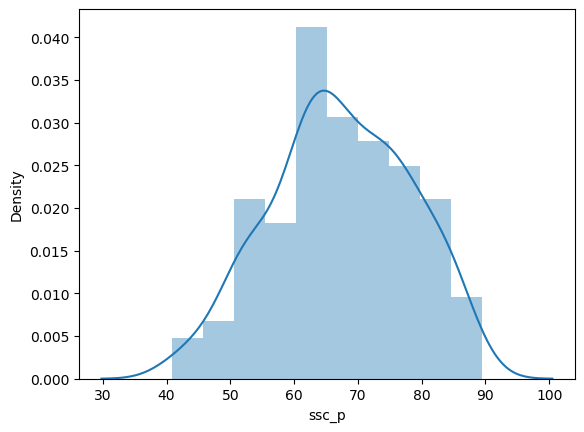

In [6]:
sns.distplot(dataset['ssc_p'])

In [7]:
#create the function get_PDF_Probability by passing 3 params dataset, start and end ranges
def get_PDF_Probability(dataset, startrange, endrange):
    #using sns.histplot, to change the color for histogram and curve for Normal distribution
    ax = sns.histplot(dataset, kde=True,kde_kws={'bw_adjust': 1.0}, line_kws={'color':'blue'},color='green')
    #by using pyplot.axvline, to change the color of start and end rage vertical lines
    pyplot.axvline(startrange,color="red")
    pyplot.axvline(endrange,color="red")
    
    #genrate a sample
    sample = dataset
    
    #calculate params
    #mean and standard deviation plays a vital role in normal distribution.
    #so derive the mean and SD
    sample_mean = sample.mean()
    sample_std = sample.std()
    #Here print the value for mean and SD 
    print("Mean=%.3f, Standard Deviation=%.3f" % (sample_mean,sample_std))
    
    #define normal distribution
    #To define the normal distribution by passing the mean and SD into the norm which imports from scipy.stats
    dist = norm(sample_mean, sample_std)
    
    #sample probs for the range of outcomes
    #Traditional method
    #1 The values in the range of startrange and endrange append inside the values
    values = []
    for value in range(startrange,endrange):
        values.append(value)
    #1 The dist.pdf(value) append inside the probabilities
    probabilities = []
    for value in values:
        probabilities.append(dist.pdf(value) )
    #summation
    prob = sum(probabilities)
    #Finally print the probabilities which occurs in start and end ranges
    print("The area between the range ({},{}):{}".format(startrange, endrange,sum(probabilities)))
    return prob

Mean=67.303, Standard Deviation=10.827
The area between the range (50,70):0.5304184324400784


0.5304184324400784

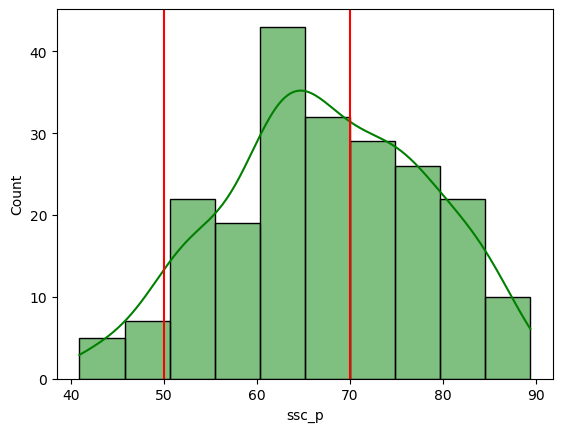

In [8]:
get_PDF_Probability(dataset["ssc_p"], 50, 70)